<a href="https://colab.research.google.com/github/bsgreenb/math-tools/blob/master/Geometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primitive Notions

Points ($ A $), Lines ($ \overleftrightarrow{AB} $), Line Segments ($ \overline{\rm AB} $), Rays ($ \overrightarrow{AB} $).  Lines can be parallel ($ A \parallel B $)

The notation for line-length is just the points like $ AB $ , to distinguish it from line segment itself.. 


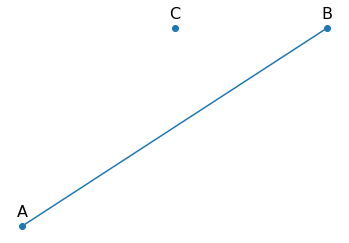

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


try:
  import google.colab
  import sys
  from os import path
  # We are in colab

  if not path.isdir('math-tools'):
    !git clone https://github.com/bsgreenb/math-tools.git
    sys.path.append('math-tools')
  from latex import *
except:
  from latex import *

def label(text, coords):
  plt.annotate(text, # this is the text
                 coords, # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# Plot a line with arrows on both ends
def plotLine(plt, start, end, txt= None):
  plt.annotate(text='', xy=end, xytext=start, arrowprops=dict(arrowstyle='<->'))
  if txt:
    label(txt, end)

#TODO: add a plotted line here

plt.plot([1, 2], [3, 4], marker = 'o')  
plt.plot([1.5], [4], marker='o', color='C0')
plt.axis('off')
label('A',(1,3))
label('B',(2,4))
label('C',(1.5,4))

plt.show()

# Axioms

There are lots of these, just going to note the ones I use in later proofs

## Corresponding Angles Axiom

If a transversal ($ n $) intersects two parallel lines ($ l \parallel m $), then each pair of corresponding angles are congruent ($ \angle 1 \cong \angle 2 $).

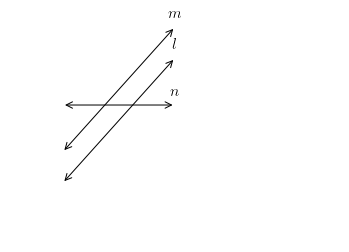

In [2]:
# QSTN: how can I make my imports and common functions automatically run at start?

plotLine(plt, (1,2), (3,6), r"$ l $")
plotLine(plt, (1,3), (3,7), r"$ m $")

plotLine(plt, (1, 4.5), (3, 4.5), r"$ n $")

# QSTN: setting limits properly is challenging
plt.xlim(0, 6)
plt.ylim(0, 7)
plt.axis('off')
plt.show()


Converse is also true: if a transversal through two lines creates a pair of corresponding angle, then the lines are parallel.